In [1]:
import pandas as pd
import numpy as np
import logging
from scipy import stats
from io import StringIO
import logging

In [2]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.modelo_360.nodes as model_360
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Create a string buffer to capture log output
log_capture_string = StringIO()
ch = logging.StreamHandler(log_capture_string)
ch.setLevel(logging.INFO)
logger.addHandler(ch)

In [5]:
%load_ext kedro.ipython

[03/04/25 15:10:52] INFO     Resolved project path as:                                              ]8;id=716091;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=764940;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/04/25 15:10:52] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=557134;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=858810;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=243951;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=936799;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=108796;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=182914;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=45075;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=126678;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[03/04/25 15:10:53] INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=912951;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=465502;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=827218;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=812556;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=966256;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=589768;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### 1. nodos

##### 1.1 Cargar bases, normaliza y concatena

In [7]:
# Python function that loads a parquet from a path
def load_parquet(path):
    return pd.read_parquet(path)

# Python function that loads csv from a path
def load_csv(path):
    return pd.read_csv(path)

## Backtesting Modelo 360

In [8]:
ruta = 's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/modelo_360/'
archivo = 'campana_full_202412_backtesting.parquet'

In [9]:
modelo_360 = load_parquet(f'{ruta}/{archivo}')
modelo_360.head(4)

,hashvalue1,DEFINIT,probabilidad_1,probabilidad_2,probabilidad_3,probabilidad_4,probabilidad_5,probabilidad_6,probabilidad_7,probabilidad_8,...,decil_6,decil_7,decil_8,decil_9,decil_10,decil_11,propension_360,region,decil_ingreso,categoria
0,CC1023869521,C1023869521,0.053538,0.158594,0.270023,0.001378,0.104359,0.035744,0.026963,0.034066,...,10.0,10.0,10.0,10.0,9.0,10.0,10,Region_Central,10.0,2.0
1,CC78030334,C78030334,0.027656,0.051590,0.001564,0.270024,0.003827,0.037425,0.103951,0.019344,...,10.0,10.0,10.0,10.0,9.0,8.0,10,Region_Caribe,10.0,2.0
2,CC1128270438,C1128270438,0.093631,0.038685,0.158588,0.104794,0.027294,0.048781,0.084021,0.269925,...,10.0,10.0,9.0,10.0,8.0,9.0,10,Region_Andina,9.0,2.0
3,CC7142761,C7142761,0.056613,0.270039,0.027692,0.104717,0.001259,0.003766,0.158497,0.009205,...,10.0,9.0,10.0,10.0,8.0,8.0,10,Region_Caribe,10.0,3.0


#### DISTRIBUCION DE PRODUCTOS/PROPENSION

In [10]:
pastel = pd.DataFrame()
all_prods = []
for i in range(1,15,1):
    col = f'propension_{i}'
    prod = f'producto_{i}'
    if col in modelo_360.columns:
        temp = modelo_360[[prod,col]].copy()
        all_prods = list(set(all_prods+temp[prod].tolist()))
        # Crear una nueva columna que combine las dos columnas
        temp.loc[:,'combinacion'] = temp.loc[:,prod].astype(str) + ': ' + temp.loc[:,col].astype(str)
        
        # Contar los duplicados de la combinación
        duplicados = temp.groupby('combinacion').size().reset_index(name=prod).set_index('combinacion')#.rename(columns = {'combinacion':prod})
        pastel = pd.concat([pastel,duplicados], axis = 1)
display(all_prods)
#pastel.head(3)

['FID', 'LIBRANZA', 'CS', 'RETANQUEO', 'SP', 'LD', 'CDT', 'VIV', 'VEH', 'TC', 'AH', 'CC']

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
def conteos(pastel,nominal,modelo_360,propensiones):
    view_all = pd.DataFrame()
    view_all_prod = pd.DataFrame()
    for col in propensiones:
        deseo_ver = []
        index_prod = []
        for prod in all_prods:
            deseo_ver.append(prod+': '+col)
            index_prod.append(prod)
        view = pastel.loc[deseo_ver].copy()
        view = view.T.dropna(how = 'all').T
        if nominal == True:
            pass
        else:
            view = view / modelo_360.shape[0]
            view = (view*100).round(3)
        view_2 = view.sum(axis = 1).to_frame().rename(columns = {0:col})
        view_2.index = index_prod
        view_all_prod = pd.concat([view_all_prod,view_2],axis = 1)
        view = view.sort_values(ascending=False, by = 'producto_1')
        view1 = view.sum().to_frame().rename(columns={0:'Total'}).T
        view = pd.concat([view1,view], axis = 0)
        view1.index = [col]
        view_all = pd.concat([view_all,view1], axis = 0)
        display(view)
        #plt.figure(figsize=(15,4))
        #plt.title(f'Conteos de Segmento y producto: {col}')
        #sns.heatmap(view_all, annot = True, fmt = 'g',cmap='RdBu')
        #plt.show()
    
    col = view_all.columns.tolist()
    col = ['Total'] + col
    view_all['Total'] = view_all.sum(axis=1)
    view_all = view_all[col]
    col = view_all_prod.index.tolist()
    col = ['Total'] + col
    view_all_prod.loc['Total'] = view_all_prod.sum(axis=0)
    view_all_prod = view_all_prod.loc[col]

    plt.figure(figsize=(17,3))
    if nominal == True:
        plt.title(f'Conteo del archivo por Segmento y producto en Miles')
        sns.heatmap(view_all/1000, annot = True, fmt = 'g',cmap='RdBu')
        plt.xlabel('Datos en Miles')
    else:
        plt.title(f'Frecuencia del archivo por Segmento y producto')
        sns.heatmap(view_all/100, annot = True, fmt = '0.2%',cmap='RdBu')
    plt.xticks(rotation=0)
    plt.show()
    #view_all_prod2 = view_all_prod.cumusum(axis=1).copy()
    plt.figure(figsize=(6,4))
    if nominal == True:
        plt.title(f'Capacidad de contactar en Miles')
        sns.heatmap((view_all_prod.cumsum(axis = 1)/1000).round(0), annot = True, fmt = 'g',cmap='RdBu')
        plt.xlabel('Datos en Miles')
    else:
        plt.title(f'Frecuencia al contactar')
        sns.heatmap(view_all_prod.cumsum(axis = 1)/100, annot = True, fmt = '0.2%',cmap='RdBu')

    plt.xticks(rotation=0)
    plt.show()
    return view_all,view_all_prod

**Distribucion en valores totales:**

In [64]:
269357.0+49831.0+12274.0+2923.0+523.0+80+11+1

335000.0

,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8
Total,269357.0,49831.0,12274.0,2923.0,523.0,80.0,11.0,1.0
CDT: Muy Alto,37810.0,1901.0,259.0,27.0,2.0,1.0,NaN,NaN
VIV: Muy Alto,37347.0,2330.0,268.0,51.0,4.0,NaN,NaN,NaN
SP: Muy Alto,36907.0,2669.0,373.0,45.0,6.0,NaN,NaN,NaN
LD: Muy Alto,32313.0,6643.0,896.0,129.0,17.0,1.0,1.0,NaN
RETANQUEO: Muy Alto,28447.0,1371.0,156.0,22.0,2.0,1.0,NaN,NaN
TC: Muy Alto,22421.0,12655.0,3828.0,905.0,164.0,25.0,2.0,NaN
AH: Muy Alto,21173.0,3014.0,574.0,191.0,41.0,7.0,NaN,NaN
CS: Muy Alto,17924.0,5727.0,1110.0,198.0,39.0,1.0,NaN,1.0
VEH: Muy Alto,15022.0,7058.0,2262.0,578.0,69.0,11.0,NaN,NaN


,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9
Total,235699.0,68905.0,27771.0,12019.0,4323.0,1086.0,171.0,22.0,4.0
VIV: Alto,33868.0,4203.0,1312.0,438.0,146.0,29.0,3.0,1.0,NaN
CDT: Alto,31998.0,5087.0,2019.0,666.0,188.0,35.0,6.0,1.0,NaN
LD: Alto,31005.0,7064.0,1308.0,487.0,110.0,21.0,4.0,1.0,NaN
CC: Alto,28376.0,11502.0,5379.0,2920.0,1341.0,404.0,67.0,9.0,2.0
RETANQUEO: Alto,25782.0,1441.0,232.0,64.0,22.0,4.0,NaN,NaN,NaN
TC: Alto,18202.0,12766.0,5686.0,2427.0,736.0,162.0,17.0,4.0,NaN
VEH: Alto,17631.0,9226.0,4903.0,2210.0,806.0,184.0,38.0,1.0,1.0
SP: Alto,12130.0,4818.0,2128.0,718.0,171.0,31.0,3.0,1.0,NaN
AH: Alto,11989.0,2581.0,253.0,92.0,48.0,28.0,7.0,1.0,1.0


,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Total,2568265.0,1991583.0,1347786.0,884215.0,547142.0,312265.0,169549.0,84962.0,33096.0,7033.0,466.0
LD: Medio Alto,549704.0,172492.0,63385.0,30117.0,15905.0,8167.0,3709.0,1216.0,291.0,49.0,3.0
CC: Medio Alto,305372.0,170299.0,123249.0,101952.0,74895.0,48559.0,26116.0,10986.0,3097.0,481.0,32.0
SP: Medio Alto,284075.0,272578.0,157381.0,93374.0,40465.0,12404.0,3591.0,935.0,198.0,36.0,1.0
LIBRANZA: Medio Alto,279228.0,68394.0,28389.0,14893.0,9320.0,4262.0,2044.0,947.0,288.0,52.0,7.0
VIV: Medio Alto,264090.0,90011.0,55665.0,43174.0,35900.0,24675.0,14043.0,6472.0,1851.0,277.0,17.0
CDT: Medio Alto,187872.0,102233.0,69200.0,56488.0,47605.0,34447.0,22841.0,11461.0,3514.0,498.0,16.0
FID: Medio Alto,157206.0,186744.0,147427.0,114524.0,99527.0,76553.0,55744.0,38061.0,19504.0,4522.0,226.0
AH: Medio Alto,143656.0,390159.0,199104.0,91647.0,36112.0,12647.0,5825.0,3334.0,1654.0,758.0,142.0
TC: Medio Alto,127114.0,285278.0,211088.0,124617.0,63574.0,24400.0,6581.0,1387.0,206.0,17.0,1.0


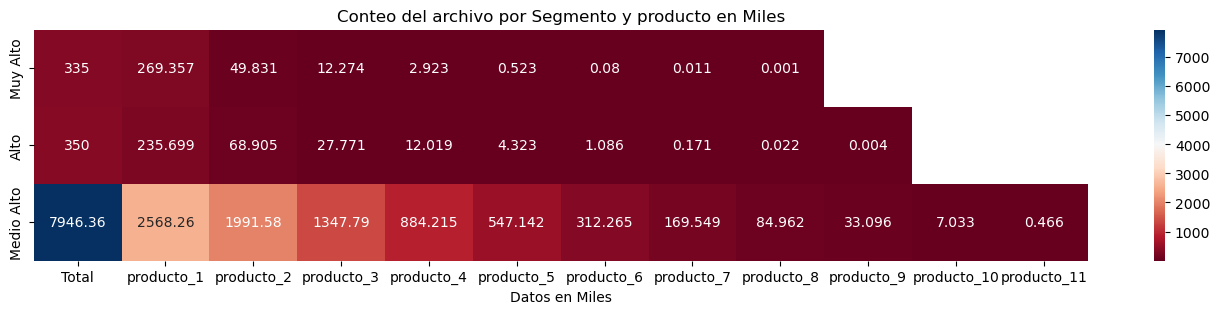

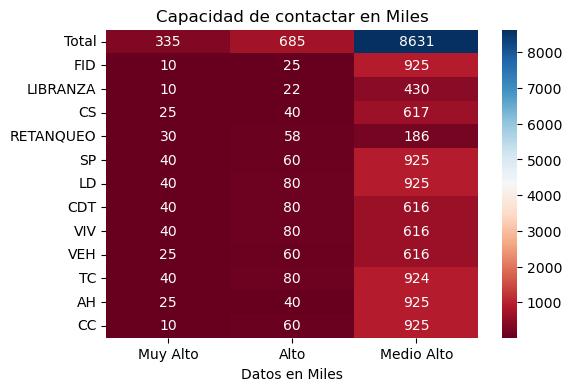

In [59]:
view_all,view_all_prod = conteos(pastel,True,modelo_360,['Muy Alto','Alto', 'Medio Alto'])

In [60]:
view_all_prod.cumsum(axis = 1)

,Muy Alto,Alto,Medio Alto
Total,335000.0,685000.0,8631362.0
FID,10000.0,25000.0,925038.0
LIBRANZA,10001.0,22456.0,430280.0
CS,25000.0,40000.0,616692.0
RETANQUEO,29999.0,57544.0,186412.0
SP,40000.0,60000.0,925038.0
LD,40000.0,80000.0,925038.0
CDT,40000.0,80000.0,616175.0
VIV,40000.0,80000.0,616175.0
VEH,25000.0,60000.0,616175.0


**Distribucion en porcentaje:**

- Valores ya multiplicados por 100

,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8
Total,6.497,1.200,0.297,0.072,0.012,0.002,0.0,0.0
CDT: Muy Alto,0.912,0.046,0.006,0.001,0.000,0.000,NaN,NaN
VIV: Muy Alto,0.901,0.056,0.006,0.001,0.000,NaN,NaN,NaN
SP: Muy Alto,0.890,0.064,0.009,0.001,0.000,NaN,NaN,NaN
LD: Muy Alto,0.780,0.160,0.022,0.003,0.000,0.000,0.0,NaN
RETANQUEO: Muy Alto,0.686,0.033,0.004,0.001,0.000,0.000,NaN,NaN
TC: Muy Alto,0.541,0.305,0.092,0.022,0.004,0.001,0.0,NaN
AH: Muy Alto,0.511,0.073,0.014,0.005,0.001,0.000,NaN,NaN
CS: Muy Alto,0.432,0.138,0.027,0.005,0.001,0.000,NaN,0.0
VEH: Muy Alto,0.362,0.170,0.055,0.014,0.002,0.000,NaN,NaN


,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9
Total,5.686,1.663,0.670,0.291,0.105,0.027,0.003,0.0,0.0
VIV: Alto,0.817,0.101,0.032,0.011,0.004,0.001,0.000,0.0,NaN
CDT: Alto,0.772,0.123,0.049,0.016,0.005,0.001,0.000,0.0,NaN
LD: Alto,0.748,0.170,0.032,0.012,0.003,0.001,0.000,0.0,NaN
CC: Alto,0.685,0.278,0.130,0.070,0.032,0.010,0.002,0.0,0.0
RETANQUEO: Alto,0.622,0.035,0.006,0.002,0.001,0.000,NaN,NaN,NaN
TC: Alto,0.439,0.308,0.137,0.059,0.018,0.004,0.000,0.0,NaN
VEH: Alto,0.425,0.223,0.118,0.053,0.019,0.004,0.001,0.0,0.0
SP: Alto,0.293,0.116,0.051,0.017,0.004,0.001,0.000,0.0,NaN
AH: Alto,0.289,0.062,0.006,0.002,0.001,0.001,0.000,0.0,0.0


,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Total,61.966,48.051,32.519,21.334,13.201,7.534,4.092,2.049,0.800,0.169,0.009
LD: Medio Alto,13.263,4.162,1.529,0.727,0.384,0.197,0.089,0.029,0.007,0.001,0.000
CC: Medio Alto,7.368,4.109,2.974,2.460,1.807,1.172,0.630,0.265,0.075,0.012,0.001
SP: Medio Alto,6.854,6.576,3.797,2.253,0.976,0.299,0.087,0.023,0.005,0.001,0.000
LIBRANZA: Medio Alto,6.737,1.650,0.685,0.359,0.225,0.103,0.049,0.023,0.007,0.001,0.000
VIV: Medio Alto,6.372,2.172,1.343,1.042,0.866,0.595,0.339,0.156,0.045,0.007,0.000
CDT: Medio Alto,4.533,2.467,1.670,1.363,1.149,0.831,0.551,0.277,0.085,0.012,0.000
FID: Medio Alto,3.793,4.506,3.557,2.763,2.401,1.847,1.345,0.918,0.471,0.109,0.005
AH: Medio Alto,3.466,9.413,4.804,2.211,0.871,0.305,0.141,0.080,0.040,0.018,0.003
TC: Medio Alto,3.067,6.883,5.093,3.007,1.534,0.589,0.159,0.033,0.005,0.000,0.000


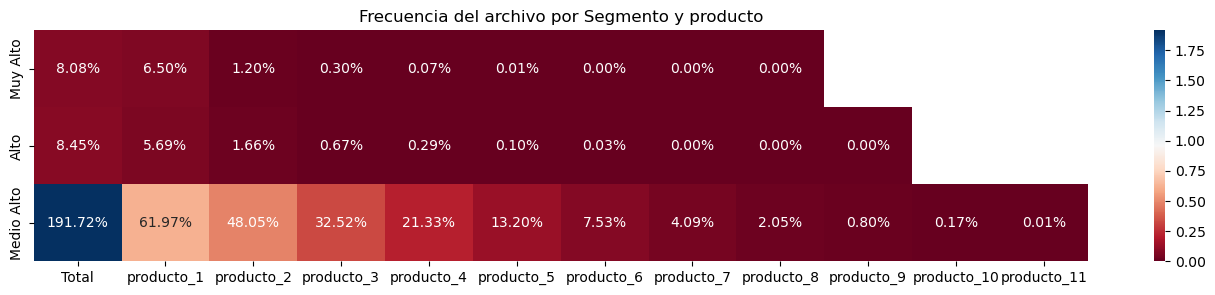

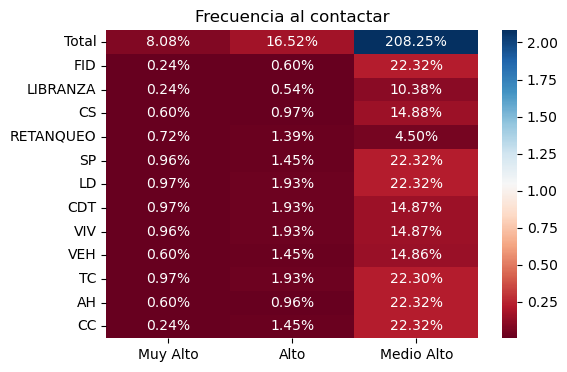

In [58]:
view_all,view_all_prod = conteos(pastel,False,modelo_360,['Muy Alto','Alto', 'Medio Alto'])

In [63]:
view_all/modelo_360.shape[0]*100

,Total,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Muy Alto,8.082420,6.498676,1.202254,0.296130,0.070522,0.012618,0.001930,0.000265,0.000024,NaN,NaN,NaN
Alto,8.444320,5.686622,1.662445,0.670021,0.289978,0.104299,0.026202,0.004126,0.000531,0.000097,NaN,NaN
Medio Alto,191.718921,61.963575,48.050182,32.517532,21.333126,13.200692,7.533902,4.090646,2.049847,0.798495,0.169683,0.011243


In [53]:
view_all

,Total,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Muy Alto,8.080,6.497,1.200,0.297,0.072,0.012,0.002,0.000,0.000,NaN,NaN,NaN
Alto,8.445,5.686,1.663,0.670,0.291,0.105,0.027,0.003,0.000,0.0,NaN,NaN
Medio Alto,191.724,61.966,48.051,32.519,21.334,13.201,7.534,4.092,2.049,0.8,0.169,0.009


In [36]:
view_all_prod.cumsum(axis = 1)

,Muy Alto,Alto,Medio Alto
FID,0.241,0.602,22.317
LIBRANZA,0.241,0.541,10.380
CS,0.603,0.965,14.879
RETANQUEO,0.724,1.390,4.499
SP,0.964,1.446,22.317
LD,0.965,1.931,22.319
CDT,0.965,1.931,14.869
VIV,0.964,1.930,14.867
VEH,0.603,1.446,14.864
TC,0.965,1.930,22.300


#### DISTRIBUCION DE PROPENSION POR PRODUCTO VS APERTURAS REALES

In [18]:
all_prods_homolog = {
'LIBRANZA':'lib_cant_aper_mes',
'TC':'tc_cant_aper_mes',
'LD':'ld_cant_aper_mes',
'CS':'cs_cant_aper_mes',
'SP':'sus_cant_aper_mes',
'VIV':'viv_cant_aper_mes',
'AH':'ah_cant_aper_mes',
'FID':'fid_cant_aper_mes',
'RETANQUEO':'lib_cant_aper_mes',
'VEH':'veh_cant_aper_mes',
'CC':'cc_cant_aper_mes',
'CDT':'cdt_cant_aper_mes'
    }

In [19]:
archivo_real = 's3://data-bbog-dev-refined/estandarizado/feature-store/599-persona-natural/feature-store_599-persona-natural_master-table-599_cds_m202501/'

In [20]:
df_real = load_parquet(archivo_real)

IOStream.flush timed out


In [21]:
archivo_real2 = 's3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/BigQuery/feature_personas_m202501.parquet'

In [22]:
df_real2 = load_parquet(archivo_real2)

In [23]:
variables_revisar = []
ordenamiento_prod = []
for i in range(1,15,1):
    col = f'propension_{i}'
    prod = f'producto_{i}'
    if col in modelo_360.columns:
        variables_revisar.append([prod,col])
        ordenamiento_prod.append(prod)
variables_revisar


[
    ['producto_1', 'propension_1'],
    ['producto_2', 'propension_2'],
    ['producto_3', 'propension_3'],
    ['producto_4', 'propension_4'],
    ['producto_5', 'propension_5'],
    ['producto_6', 'propension_6'],
    ['producto_7', 'propension_7'],
    ['producto_8', 'propension_8'],
    ['producto_9', 'propension_9'],
    ['producto_10', 'propension_10'],
    ['producto_11', 'propension_11']
]

In [24]:
resumen_all = pd.DataFrame()
for level,producto in enumerate(all_prods):
    variable_target = all_prods_homolog[producto]
    print(producto,': ',variable_target, f'{level} de {len(all_prods)}')
    try:
        df_real[variable_target.split('_')[0]+'_id'] = (df_real[variable_target]>0).astype(int)
        trues = df_real[variable_target.split('_')[0]+'_id'].sum() # verdaderos
        df_real_temp = df_real.copy()
    except:
        df_real2[variable_target.split('_')[0]+'_id'] = (df_real2[variable_target]>0).astype(int)
        trues = df_real2[variable_target.split('_')[0]+'_id'].sum() # verdaderos
        df_real_temp = df_real2.copy()
    for propension in ['Muy Alto','Alto','Medio Alto']:
        resumen = pd.DataFrame()
        for col,segm in variables_revisar:
            archivo_temp = modelo_360[[params['id'],col,segm]]
            archivo_temp_filt = archivo_temp[archivo_temp[col]==producto]
            archivo_temp_filt = archivo_temp_filt[archivo_temp_filt[segm]==propension]
            archivo_temp_filt = pd.merge(archivo_temp_filt,df_real_temp[[params['id'],variable_target.split('_')[0]+'_id']], on = params['id'], how = 'left')
            contactos = archivo_temp_filt.shape[0]
            nulos = archivo_temp_filt[variable_target.split('_')[0]+'_id'].isnull().sum()
            true_positive = archivo_temp_filt[variable_target.split('_')[0]+'_id'].sum()
            res = pd.DataFrame([trues,true_positive,contactos,nulos,col,propension,producto], index = ['Aperturas','TP','Contactos','Nulos','Columna 360','Propension','Producto']).T
            resumen = pd.concat([resumen,res], axis = 0)
        resumen_all = pd.concat([resumen,resumen_all], axis = 0)

FID :  fid_cant_aper_mes 0 de 12
LIBRANZA :  lib_cant_aper_mes 1 de 12
CS :  cs_cant_aper_mes 2 de 12
RETANQUEO :  lib_cant_aper_mes 3 de 12
SP :  sus_cant_aper_mes 4 de 12
LD :  ld_cant_aper_mes 5 de 12
CDT :  cdt_cant_aper_mes 6 de 12
VIV :  viv_cant_aper_mes 7 de 12
VEH :  veh_cant_aper_mes 8 de 12
TC :  tc_cant_aper_mes 9 de 12
AH :  ah_cant_aper_mes 10 de 12
CC :  cc_cant_aper_mes 11 de 12


In [25]:
resumen_aperturas = resumen_all.pivot(index=['Producto','Propension'], columns = 'Columna 360',values='Aperturas')
resumen_aperturas['Total'] = resumen_aperturas['producto_1']
resumen_aperturas = resumen_aperturas[['Total']+ordenamiento_prod]
#resumen_aperturas = pd.concat([resumen_aperturas.sum(axis=1).to_frame().rename(columns = {0:'Total'}),resumen_aperturas], axis = 1)

resumen_tp = resumen_all.pivot(index=['Producto','Propension'], columns = 'Columna 360',values='TP') 
resumen_tp = pd.concat([resumen_tp.sum(axis=1).to_frame().rename(columns = {0:'Total'}),resumen_tp], axis = 1)

resumen_Contactos = resumen_all.pivot(index=['Producto','Propension'], columns = 'Columna 360',values='Contactos') 
resumen_Contactos = pd.concat([resumen_Contactos.sum(axis=1).to_frame().rename(columns = {0:'Total'}),resumen_Contactos], axis = 1)

resumen_nulos = resumen_all.pivot(index=['Producto','Propension'], columns = 'Columna 360',values='Nulos') 
resumen_nulos = pd.concat([resumen_nulos.sum(axis=1).to_frame().rename(columns = {0:'Total'}),resumen_nulos], axis = 1)


**Conteo de clientes con pronosticos y sin resultado de apertura**

- Pronosticos de clientes que ya no aparecen en la base de la 599.

resumen_nulos2 = resumen_nulos[ordenamiento_prod].copy()
for col in ['Muy Alto','Alto','Medio Alto']:
    resumen_nulos2_filt = resumen_nulos2.xs(key=col, level = 'Propension')
    resumen_nulos2_filt = resumen_nulos2_filt.replace(0,np.nan).T.dropna(how = 'all').T
    resumen_nulos2_filt = resumen_nulos2_filt.round(2)
    plt.figure(figsize=(15,4))
    plt.title(f'Numero de clientes no encontrados en el backtesting para el Segmento: {col}')
    sns.heatmap(resumen_nulos2_filt, annot = True, fmt = 'g',cmap='RdBu_r')
    plt.show()

**Conteo de Aciertos**

[03/04/25 15:44:13] WARNING  /tmp/ipykernel_787/3359929978.py:5: FutureWarning: Downcasting         ]8;id=63201;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=520025;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             behavior in `replace` is deprecated and will be removed in a future                   
                             version. To retain the old behavior, explicitly call                                  
                             `result.infer_objects(copy=False)`. To opt-in to the future behavior,                 
                             set `pd.set_option('future.no_silent_downcasting', True)`                             
                               aciertos_filt = aciertos_filt.replace(0,np.nan).T.dropna(how =                      
                             'all').T                                                                              
                                                                                                                   

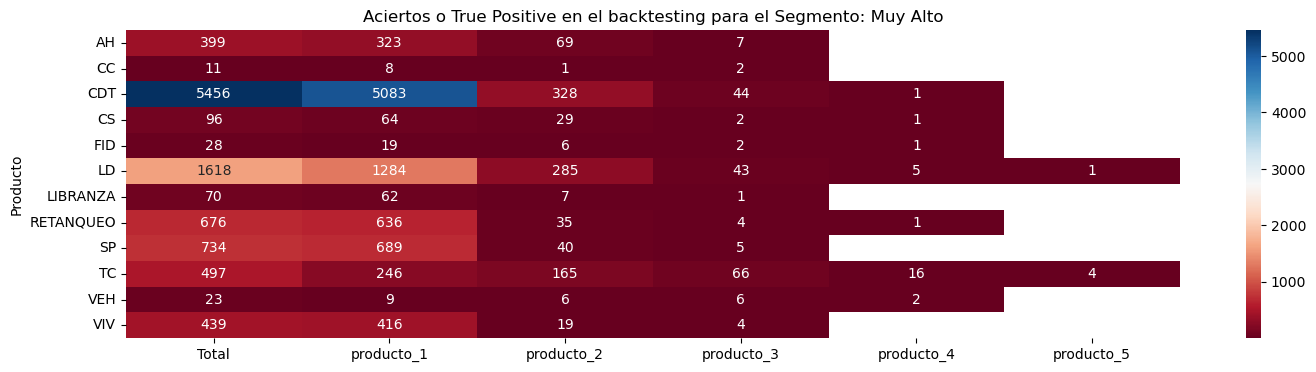

                    WARNING  /tmp/ipykernel_787/3359929978.py:5: FutureWarning: Downcasting         ]8;id=968966;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=997020;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             behavior in `replace` is deprecated and will be removed in a future                   
                             version. To retain the old behavior, explicitly call                                  
                             `result.infer_objects(copy=False)`. To opt-in to the future behavior,                 
                             set `pd.set_option('future.no_silent_downcasting', True)`                             
                               aciertos_filt = aciertos_filt.replace(0,np.nan).T.dropna(how =                      
                             'all').T                                                                              
                                                                                                                   

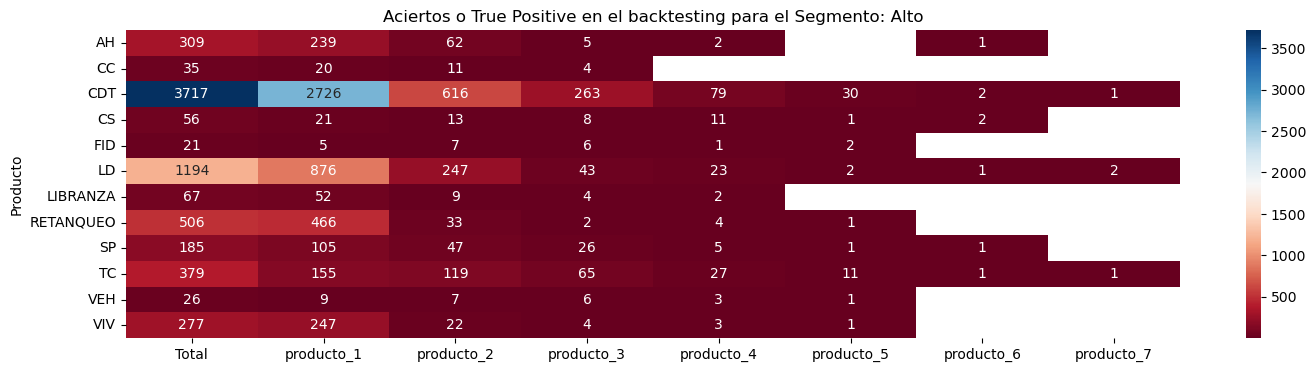

[03/04/25 15:44:14] WARNING  /tmp/ipykernel_787/3359929978.py:5: FutureWarning: Downcasting         ]8;id=870801;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=628533;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             behavior in `replace` is deprecated and will be removed in a future                   
                             version. To retain the old behavior, explicitly call                                  
                             `result.infer_objects(copy=False)`. To opt-in to the future behavior,                 
                             set `pd.set_option('future.no_silent_downcasting', True)`                             
                               aciertos_filt = aciertos_filt.replace(0,np.nan).T.dropna(how =                      
                             'all').T                                                                              
                                                                                                                   

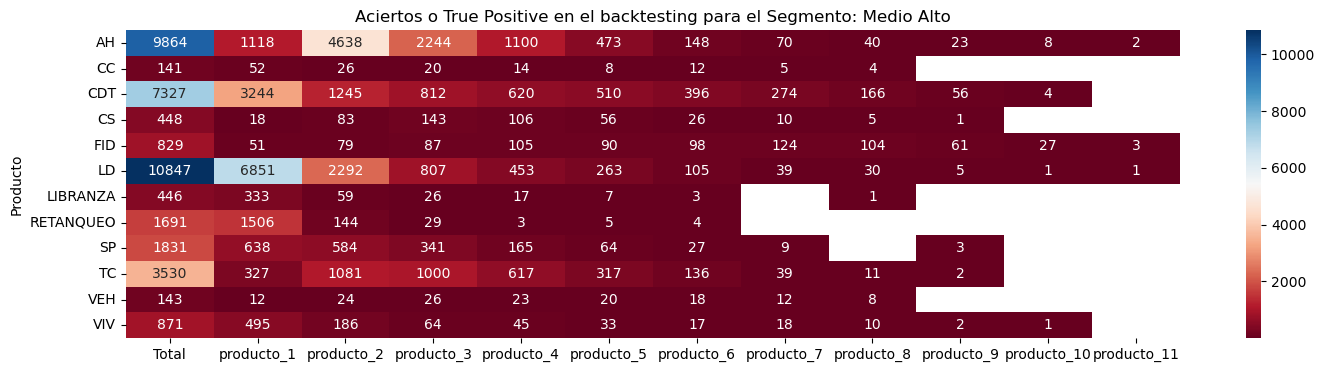

In [26]:
aciertos = resumen_tp[['Total']+ordenamiento_prod].copy()
#aciertos = pd.concat([aciertos.sum(axis=1).to_frame().rename(columns = {0:'Total'}),aciertos], axis = 1)
for col in ['Muy Alto','Alto','Medio Alto']:
    aciertos_filt = aciertos.xs(key=col, level = 'Propension').round(2)
    aciertos_filt = aciertos_filt.replace(0,np.nan).T.dropna(how = 'all').T
    #aciertos_filt = aciertos_filt.round(2)
    plt.figure(figsize=(17,4))
    plt.title(f'Aciertos o True Positive en el backtesting para el Segmento: {col}')
    sns.heatmap(aciertos_filt, annot = True, fmt = 'g',cmap='RdBu')
    plt.xticks(rotation=0)
    plt.show()

**Conteo de % Aciertos o Recall**

- Valores multiplicados por 100 o en %

                    WARNING  /tmp/ipykernel_787/2876183119.py:1: FutureWarning: Downcasting object  ]8;id=517193;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=731758;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             dtype arrays on .fillna, .ffill, .bfill is deprecated and will change                 
                             in a future version. Call result.infer_objects(copy=False) instead. To                
                             opt-in to the future behavior, set                                                    
                             `pd.set_option('future.no_silent_downcasting', True)`                                 
                               recall =                                                                            
                             (100*resumen_tp[['Total']+ordenamiento_prod]/resumen_aperturas[['Total                
                             ']+ordenamiento_prod]).fillna(np.nan).round(3)                                        
                                                                                                                   

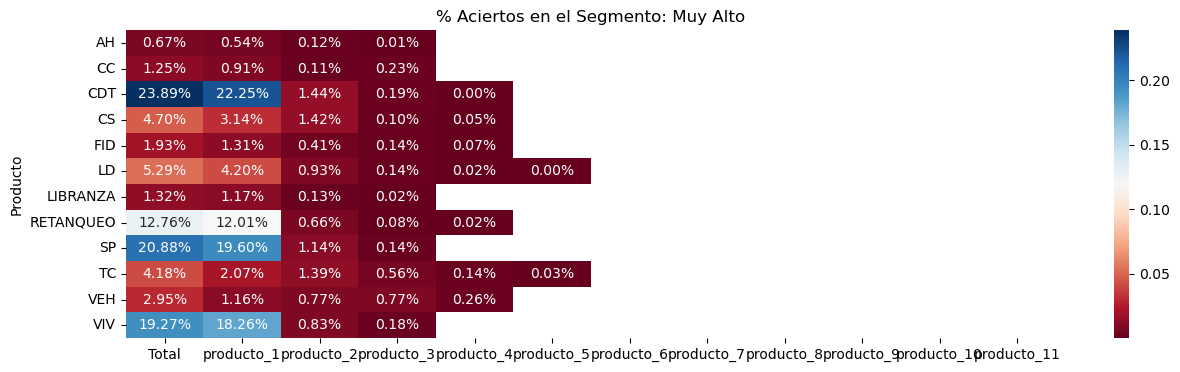

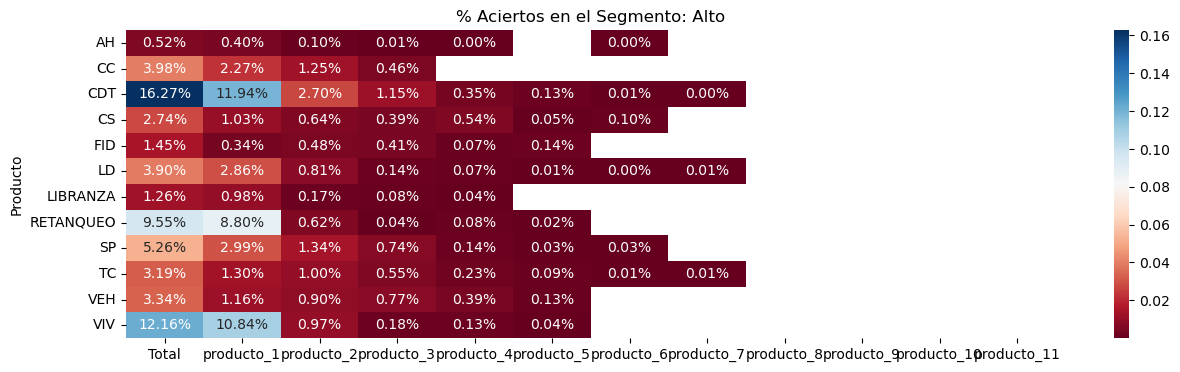

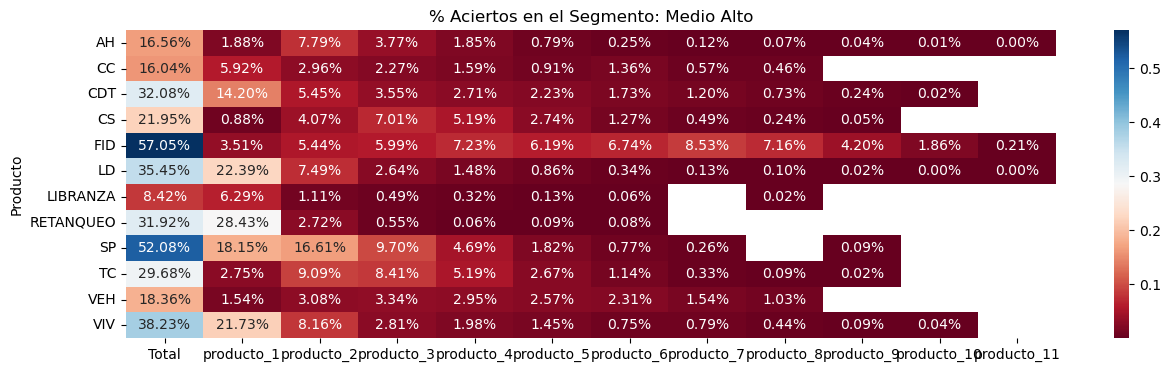

In [27]:
recall = (100*resumen_tp[['Total']+ordenamiento_prod]/resumen_aperturas[['Total']+ordenamiento_prod]).fillna(np.nan).round(3)
recall = recall.replace(0.0, np.nan)
recall = recall.reset_index()
recall['Propension'] =  pd.Categorical(recall['Propension'], categories=['Muy Alto','Alto', 'Medio Alto'])
recall.set_index(['Producto','Propension'], inplace=True)
recall = recall.sort_index()
for col in ['Muy Alto','Alto','Medio Alto']:
    recall_filt = recall.xs(key=col, level = 'Propension')/100
    #recall_filt = pd.concat([recall_filt.sum(axis=1).to_frame().rename(columns = {0:'Total'}),recall_filt], axis = 1)
    plt.figure(figsize=(17,4))
    plt.title(f'% Aciertos en el Segmento: {col}')
    sns.heatmap(recall_filt, annot = True, fmt = '0.2%',cmap='RdBu')
    plt.xticks(rotation=0)
    plt.show()
# plt.figure(figsize=(20,10))
# sns.heatmap(recall/100, annot = True, fmt = '0.2%',cmap='RdBu')
# plt.show()
# sumar por fila

**% Aciertos x Contato o Efectividad**

[03/04/25 15:44:15] INFO     Datos *100                                                              ]8;id=873264;file:///tmp/ipykernel_787/531441881.py\531441881.py]8;;\:]8;id=146191;file:///tmp/ipykernel_787/531441881.py#1\1]8;;\

[03/04/25 15:44:16] WARNING  /tmp/ipykernel_787/531441881.py:2: FutureWarning: Downcasting object   ]8;id=430383;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=115347;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             dtype arrays on .fillna, .ffill, .bfill is deprecated and will change                 
                             in a future version. Call result.infer_objects(copy=False) instead. To                
                             opt-in to the future behavior, set                                                    
                             `pd.set_option('future.no_silent_downcasting', True)`                                 
                               efect = (100*resumen_tp[['Total']+ordenamiento_prod] /                              
                             resumen_Contactos[['Total']+ordenamiento_prod]).fillna(np.nan).round(3                
                             )                                                                                     
                                                                                                                   

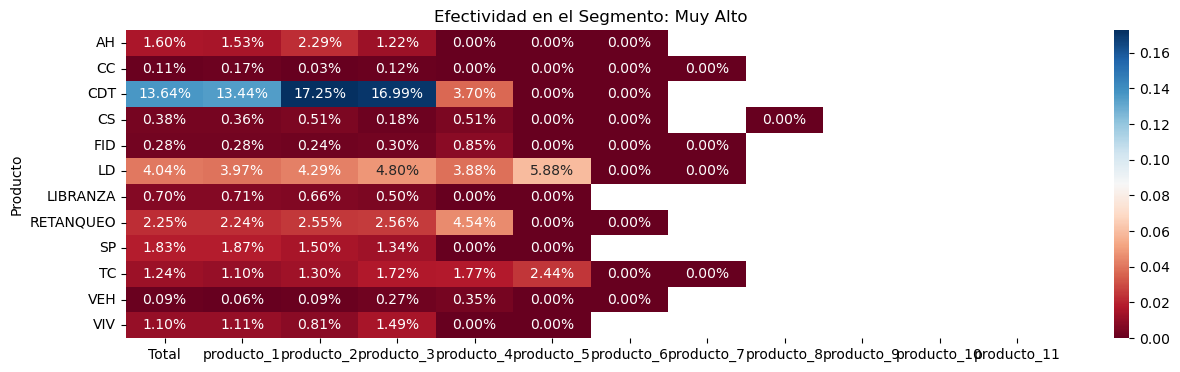

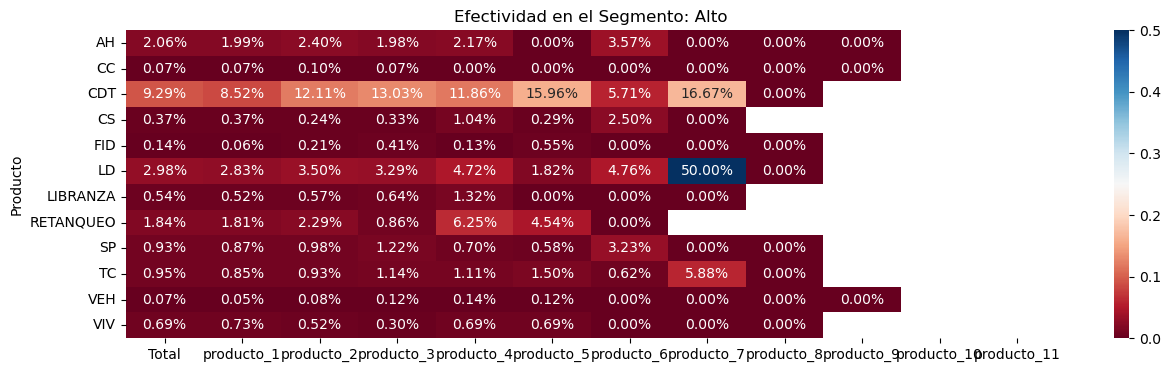

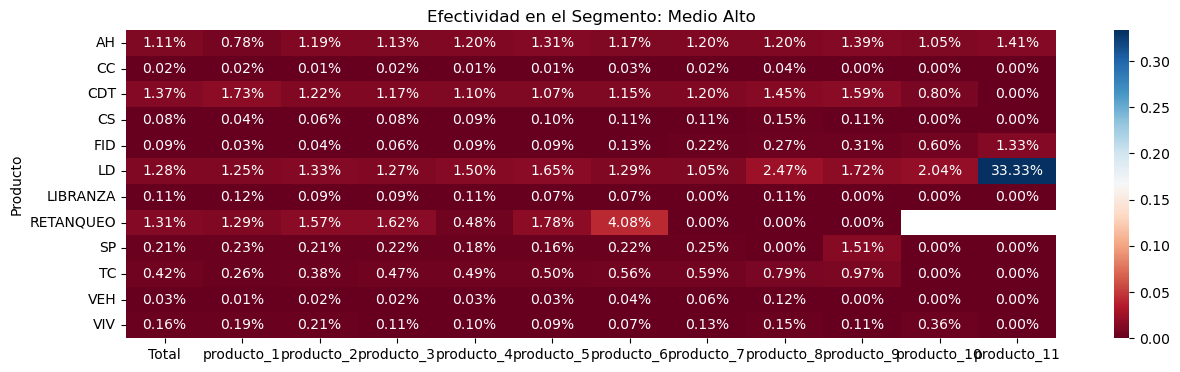

In [28]:
logger.info(f'Datos *100')
efect = (100*resumen_tp[['Total']+ordenamiento_prod] / resumen_Contactos[['Total']+ordenamiento_prod]).fillna(np.nan).round(3)
efect = efect.reset_index()
efect['Propension'] =  pd.Categorical(efect['Propension'], categories=['Muy Alto','Alto', 'Medio Alto'])
efect.set_index(['Producto','Propension'], inplace=True)
efect = efect.sort_index()
for col in ['Muy Alto','Alto','Medio Alto']:
    efect_clean_filt = efect.xs(key=col, level = 'Propension')/100
    plt.figure(figsize=(17,4))
    plt.title(f'Efectividad en el Segmento: {col}')
    sns.heatmap(efect_clean_filt, annot = True, fmt = '0.2%',cmap='RdBu')
    plt.xticks(rotation=0)
    plt.show()
# plt.figure(figsize=(20,10))
# sns.heatmap(efect/100, annot = True, fmt = '0.2%',cmap='RdBu')
# plt.show()

**% Aciertos x Contato o Efectividad Ajustada a los clientes que si sabemos que aperturaron o no**

- Existen IDs que no se encuentran en la data real y por esta razon se ajusta el numero de contactos a los que si se encontraron. 
- Luego medimos la efectividad con los clientes en donde sabemos si finalmente se aperturo o no el producto

logger.info(f'Datos *100')
efect_clean = (100*resumen_tp[['Total']+ordenamiento_prod] / (resumen_Contactos[['Total']+ordenamiento_prod]-resumen_nulos[['Total']+ordenamiento_prod])).fillna(np.nan).round(3)
efect_clean = efect_clean.reset_index()
efect_clean['Propension'] =  pd.Categorical(efect_clean['Propension'], categories=['Muy Alto','Alto', 'Medio Alto'])
efect_clean.set_index(['Producto','Propension'], inplace=True)
efect_clean = efect_clean.sort_index()
for col in ['Muy Alto','Alto','Medio Alto']:
    efect_clean_filt = efect_clean.xs(key=col, level = 'Propension')/100
    plt.figure(figsize=(15,4))
    plt.title(f'Efectividad en el Segmento: {col}')
    sns.heatmap(efect_clean_filt, annot = True, fmt = '0.2%',cmap='RdBu')
    plt.show()
# plt.figure(figsize=(20,10))
# sns.heatmap(efect_clean/100, annot = True, fmt = '0.2%',cmap='RdBu')
# plt.show()